In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import random
import seaborn as sns
pd.options.display.max_rows=300
pd.set_option('display.max_columns', None)

In [2]:
df_bt_at = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/02.aumc/df_diuretic_FST.csv")
result = df_bt_at.groupby(["groupHPD", "label_diu_res"])["stay_id"].agg(["count"]).reset_index()
df_count_all = pd.DataFrame(df_bt_at.groupby("groupHPD")["stay_id"].agg("count")).reset_index()
df_count_all.columns = ["groupHPD","groupHPD_count"]

result = pd.merge(result,df_count_all,how="inner",on="groupHPD")
result["count_percentage"] = result["count"] / result["groupHPD_count"] *100
result_aumc = result
result_aumc

,groupHPD,label_diu_res,count,groupHPD_count,count_percentage
0,1,No diuretic,119,564,21.099291
1,1,Non-responsive,138,564,24.468085
2,1,responsive,307,564,54.432624
3,2,No diuretic,445,1400,31.785714
4,2,Non-responsive,176,1400,12.571429
5,2,responsive,779,1400,55.642857
6,3,No diuretic,76,219,34.703196
7,3,Non-responsive,78,219,35.616438
8,3,responsive,65,219,29.680365


In [3]:
df_bt_at = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/06.fluid_resuscitation/01.mimic/df_diuretic_FST.csv")

result = df_bt_at.groupby(["groupHPD", "label_diu_res"])["stay_id"].agg(["count"]).reset_index()
df_count_all = pd.DataFrame(df_bt_at.groupby("groupHPD")["stay_id"].agg("count")).reset_index()
df_count_all.columns = ["groupHPD","groupHPD_count"]

result = pd.merge(result,df_count_all,how="inner",on="groupHPD")
result["count_percentage"] = result["count"] / result["groupHPD_count"] *100
result_mimic = result
result_mimic

,groupHPD,label_diu_res,count,groupHPD_count,count_percentage
0,1,No diuretic,396,1298,30.508475
1,1,Non-responsive,184,1298,14.175655
2,1,responsive,718,1298,55.315871
3,2,No diuretic,1211,3055,39.639935
4,2,Non-responsive,211,3055,6.906710
5,2,responsive,1633,3055,53.453355
6,3,No diuretic,163,360,45.277778
7,3,Non-responsive,115,360,31.944444
8,3,responsive,82,360,22.777778


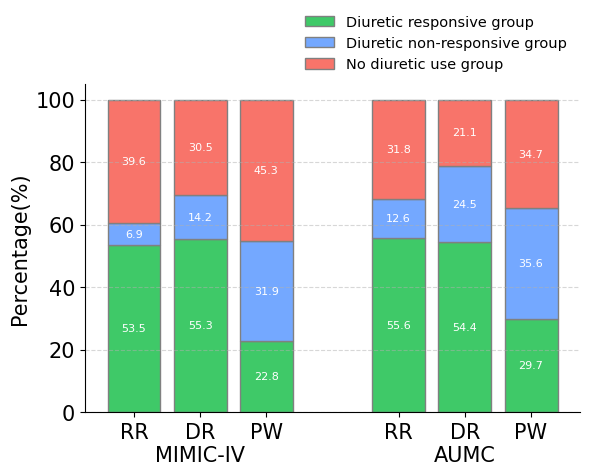

In [4]:
result_mimic["dataset"] = "mimic"
result_aumc["dataset"] = "aumc"

df_out = pd.concat([result_mimic,result_aumc],axis=0)
fixed_order1 = ["mimic","aumc"]
fixed_order2 = [2,1,3]
df_out['dataset'] = pd.Categorical(df_out['dataset'], categories=fixed_order1, ordered=True)
df_out['groupHPD'] = pd.Categorical(df_out['groupHPD'], categories=fixed_order2, ordered=True)
df_out = df_out.sort_values(by=['dataset', 'groupHPD'])

#三组诊断时的AKI等级分布
y1 = df_out[df_out["label_diu_res"]=="responsive"]["count_percentage"].tolist()
y2 = df_out[df_out["label_diu_res"]=="Non-responsive"]["count_percentage"].tolist()
y3 = df_out[df_out["label_diu_res"]=="No diuretic"]["count_percentage"].tolist()

x = [1,1.5,2,3,3.5,4]
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)

size =15
plt.figure(figsize=(6, 5))
p1=plt.bar(x,y1,width=0.4,label='Diuretic responsive group',color="#3fc968",edgecolor='grey')
p2=plt.bar(x,y2,width=0.4,bottom=y1,label='Diuretic non-responsive group',color="#74a8ff",edgecolor='grey')
p3=plt.bar(x,y3,width=0.4,bottom=y1+y2,label='No diuretic use group',color="#f8746a",edgecolor='grey')

plt.bar_label(p1, label_type='center', color="white", fontsize='8', fmt='%.1f')
plt.bar_label(p2, label_type='center', color="white", fontsize='8', fmt='%.1f')
plt.bar_label(p3, label_type='center', color="white", fontsize='8', fmt='%.1f')

plt.xticks(x,["RR","DR\nMIMIC-IV","PW","RR","DR\nAUMC","PW"],fontsize=size)
plt.yticks(fontsize=size)
plt.grid(axis='y',alpha=0.5,ls='--')

plt.legend(ncol=1,loc=1,frameon=False,bbox_to_anchor=(1,1.25),fontsize=10.5)
plt.ylabel("Percentage(%)",fontsize=size)
plt.tight_layout()
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

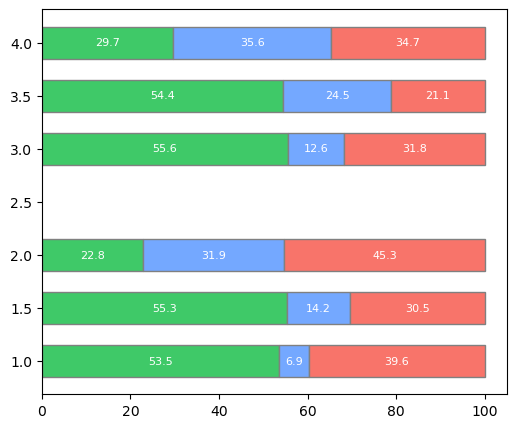

In [5]:
result_mimic["dataset"] = "mimic"
result_aumc["dataset"] = "aumc"

df_out = pd.concat([result_mimic,result_aumc],axis=0)
fixed_order1 = ["mimic","aumc"]
fixed_order2 = [2,1,3]
df_out['dataset'] = pd.Categorical(df_out['dataset'], categories=fixed_order1, ordered=True)
df_out['groupHPD'] = pd.Categorical(df_out['groupHPD'], categories=fixed_order2, ordered=True)
df_out = df_out.sort_values(by=['dataset', 'groupHPD'])

#三组诊断时的AKI等级分布
y1 = df_out[df_out["label_diu_res"]=="responsive"]["count_percentage"].tolist()
y2 = df_out[df_out["label_diu_res"]=="Non-responsive"]["count_percentage"].tolist()
y3 = df_out[df_out["label_diu_res"]=="No diuretic"]["count_percentage"].tolist()

x = [1,1.5,2,3,3.5,4]
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)

size =15
plt.figure(figsize=(6, 5))
p1=plt.barh(x,y1,height=0.3, label='Diuretic responsive group',color="#3fc968",edgecolor='grey')
p2=plt.barh(x,y2,height=0.3,  left=y1,label='Diuretic non-responsive group',color="#74a8ff",edgecolor='grey')
p3=plt.barh(x,y3,height=0.3,  left=y1+y2,label='No diuretic group',color="#f8746a",edgecolor='grey')

plt.bar_label(p1, label_type='center', color="white", fontsize='8', fmt='%.1f')
plt.bar_label(p2, label_type='center', color="white", fontsize='8', fmt='%.1f')
plt.bar_label(p3, label_type='center', color="white", fontsize='8', fmt='%.1f')

# plt.xticks(x,["RR","DR\nMIMIC-IV","PW","RR","DR\nAUMC","PW"],fontsize=size)
# plt.yticks(fontsize=size)
# plt.grid(axis='y',alpha=0.5,ls='--')

# plt.legend(ncol=1,loc=1,frameon=False,bbox_to_anchor=(1,1.25),fontsize=10.5)
# plt.ylabel("Percentage(%)",fontsize=size)
# plt.tight_layout()
# ax=plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.show()

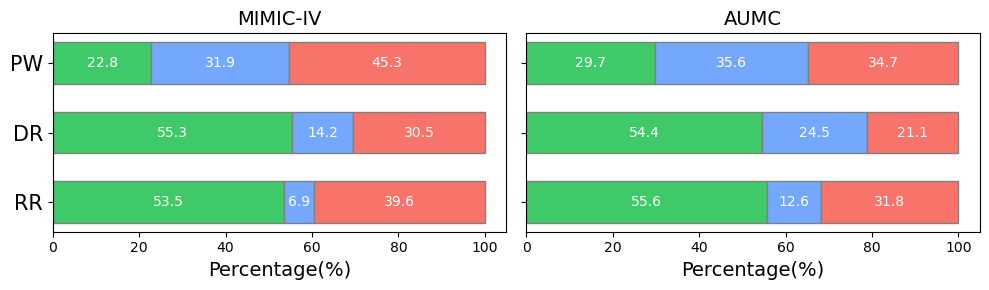

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Separate MIMIC and AUMC data
df_mimic = df_out[df_out['dataset'] == 'mimic']
df_aumc = df_out[df_out['dataset'] == 'aumc']

y1 = df_mimic[df_mimic["label_diu_res"]=="responsive"]["count_percentage"].tolist()
y2 = df_mimic[df_mimic["label_diu_res"]=="Non-responsive"]["count_percentage"].tolist()
y3 = df_mimic[df_mimic["label_diu_res"]=="No diuretic"]["count_percentage"].tolist()
x = [1,1.5,2]
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)

y1_aumc = np.array(df_aumc[df_aumc["label_diu_res"]=="responsive"]["count_percentage"].tolist())
y2_aumc = np.array(df_aumc[df_aumc["label_diu_res"]=="Non-responsive"]["count_percentage"].tolist())
y3_aumc = np.array(df_aumc[df_aumc["label_diu_res"]=="No diuretic"]["count_percentage"].tolist())

# Set up figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

# Plot MIMIC data on the left
p1 = axs[0].barh(x, y1, height=0.3, label='Diuretic responsive group', color="#3fc968", edgecolor='grey')
p2 = axs[0].barh(x, y2, height=0.3, left=y1, label='Diuretic non-responsive group', color="#74a8ff", edgecolor='grey')
p3 = axs[0].barh(x, y3, height=0.3, left=y1 + y2, label='No diuretic group', color="#f8746a", edgecolor='grey')

axs[0].bar_label(p1, label_type='center', color="white", fontsize='10', fmt='%.1f')
axs[0].bar_label(p2, label_type='center', color="white", fontsize='10', fmt='%.1f')
axs[0].bar_label(p3, label_type='center', color="white", fontsize='10', fmt='%.1f')

axs[0].set_title('MIMIC-IV',fontsize=14)
axs[0].set_xlabel("Percentage(%)",fontsize=14)
axs[0].set_yticks(x)
axs[0].set_yticklabels(["RR", "DR", "PW"], fontsize=size)
# axs[0].set_xticks(np.arange(0, 101, 20))
# axs[0].grid(axis='x', alpha=0.5, ls='--')
# axs[0].legend(ncol=1, loc=1, frameon=False, bbox_to_anchor=(1, 1.25), fontsize=10.5)

# Plot AUMC data on the right
p1 = axs[1].barh(x, y1_aumc, height=0.3, label='Diuretic responsive group', color="#3fc968", edgecolor='grey')
p2 = axs[1].barh(x, y2_aumc, height=0.3, left=y1_aumc, label='Diuretic non-responsive group', color="#74a8ff", edgecolor='grey')
p3 = axs[1].barh(x, y3_aumc, height=0.3, left=y1_aumc + y2_aumc, label='No diuretic group', color="#f8746a", edgecolor='grey')

axs[1].bar_label(p1, label_type='center', color="white", fontsize='10', fmt='%.1f')
axs[1].bar_label(p2, label_type='center', color="white", fontsize='10', fmt='%.1f')
axs[1].bar_label(p3, label_type='center', color="white", fontsize='10', fmt='%.1f')

axs[1].set_title('AUMC',fontsize=14)
axs[1].set_xlabel("Percentage(%)",fontsize=14)
# axs[1].set_yticks(x)
#axs[1].set_yticklabels([])
axs[1].set_xticks(np.arange(0, 100.1, 20))
# axs[1].grid(axis='x', alpha=0.5, ls='--')
# axs[1].legend(ncol=1, loc=1, frameon=False, bbox_to_anchor=(1, 1.25), fontsize=10.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
